In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
from sklearn import datasets #import dataset from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


#import keras
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


from scipy.stats.distributions import gamma
from scipy.stats.distributions import poisson
from scipy.stats.distributions import expon

import statistics
from scipy.stats import norm
from scipy import stats
import scipy.stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
import seaborn as sns

In [2]:
#import data
data = pd.read_csv("../MODELING TOKEN BUCKET USING CLASSIFICATION MODELS/H265-data/BluePlanet/blueplanet-QP 10.csv",
                   names=['decoded_frame','arrival_time', 'video_frame', 
                                         'frame_size', 'x', 'y', 'z'])


In [3]:
data.head()

,decoded_frame,arrival_time,video_frame,frame_size,x,y,z
0,0,0.00000,I,686.0,99.99,99.99,99.99
1,1,0.04167,B,29.0,99.99,99.99,99.99
2,2,0.08333,B,30.0,99.99,99.99,99.99
3,3,0.12500,B,29.0,99.99,99.99,99.99
4,4,0.16667,B,30.0,99.99,99.99,99.99


In [4]:
#Drop NA values
data.dropna(0,inplace= True)

In [5]:
#drop decoded frame column
data.drop(('decoded_frame'), axis=1, inplace=True)

data.drop(('x'), axis=1, inplace=True)
data.drop(('y'), axis=1, inplace=True)
data.drop(('z'), axis=1, inplace=True)

In [6]:
# Label encoding of species column numerically
le = LabelEncoder()
le.fit(data['video_frame'])
print(list(le.classes_))
data['video_frame'] = le.transform(data['video_frame'])

['B', 'I', 'P']


In [7]:
data.head()

,arrival_time,video_frame,frame_size
0,0.00000,1,686.0
1,0.04167,0,29.0
2,0.08333,0,30.0
3,0.12500,0,29.0
4,0.16667,0,30.0


In [8]:
#Drop NA values
data.frame_size.dropna(0,inplace= True)

In [9]:
data.reset_index(inplace=True)

In [10]:
data.head()

,index,arrival_time,video_frame,frame_size
0,0,0.00000,1,686.0
1,1,0.04167,0,29.0
2,2,0.08333,0,30.0
3,3,0.12500,0,29.0
4,4,0.16667,0,30.0


In [11]:
#Sort the arrival time 

data.sort_values('arrival_time', inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
data.head()

,index,arrival_time,video_frame,frame_size
0,0,0.00000,1,686.0
1,1,0.04167,0,29.0
2,2,0.08333,0,30.0
3,3,0.12500,0,29.0
4,4,0.16667,0,30.0


In [13]:
#Check for missing values

data.isnull().sum()

index           0
arrival_time    0
video_frame     0
frame_size      0
dtype: int64

In [14]:
X = data.drop('video_frame', axis=1) # predictor
Y = data['video_frame']  #response

In [15]:
#split the data
#25% hold out for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.25, random_state=25) 

In [16]:
scaler = StandardScaler()
#fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [17]:
#Now apply the transformations to the data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision' ,'recall'], 
                      columns=['LogisticReg', 'Bagging', 'RandomForest', 'Boosting','DecisionTree', 'Multilayer_Perceptron'])

# Logistic Regression

In [19]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(random_state=55)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_LR = logistic_regression.predict(X_test)


from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_LR)
confusion_matrix

array([[13149,     5,   168],
       [  256,    94,   307],
       [  817,    54,   402]], dtype=int64)

In [20]:
print(accuracy_score(y_test, y_pred_LR))

0.8946367689483347


In [21]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_LR = logistic_regression.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13322
           1       0.61      0.14      0.23       657
           2       0.46      0.32      0.37      1273

    accuracy                           0.89     15252
   macro avg       0.67      0.48      0.52     15252
weighted avg       0.87      0.89      0.88     15252



In [22]:
"""
# predict probabilities
y_pred_proba =logistic_regression.predict_proba(X_test)
print(y_pred_proba)
"""

'\n# predict probabilities\ny_pred_proba =logistic_regression.predict_proba(X_test)\nprint(y_pred_proba)\n'

In [23]:

# 4. Evaluate the model
y_pred_LR = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred_LR, y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred_LR, y_test, average='micro')
metrics.loc['recall','LogisticReg'] = recall_score(y_pred_LR, y_test,  average= 'micro')

# Bagging model

In [24]:
# 1. Import the estimator object (model)
from sklearn.ensemble import BaggingClassifier

# 2. Create an instance of the estimator
log_reg_for_bagging = LogisticRegression()
bagging = BaggingClassifier(base_estimator=log_reg_for_bagging, n_estimators=10,
                            random_state=55, n_jobs=-1)

# 3. Use the trainning data to train the estimator
bagging.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_bagging = bagging.predict(X_test)


from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bagging)
confusion_matrix

array([[13151,     4,   167],
       [  256,    90,   311],
       [  820,    49,   404]], dtype=int64)

In [25]:
print(accuracy_score(y_test, y_pred_bagging))

0.8946367689483347


In [26]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_bagging = bagging.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13322
           1       0.63      0.14      0.22       657
           2       0.46      0.32      0.37      1273

    accuracy                           0.89     15252
   macro avg       0.67      0.48      0.52     15252
weighted avg       0.87      0.89      0.87     15252



In [27]:
# predict probabilities
y_pred_proba =bagging.predict_proba(X_test)
print(y_pred_proba)

[[0.95155507 0.00952713 0.0389178 ]
 [0.97466703 0.00439825 0.02093472]
 [0.96055368 0.00781988 0.03162644]
 ...
 [0.97281812 0.00506166 0.02212022]
 [0.96871016 0.00586    0.02542983]
 [0.9614036  0.00746983 0.03112657]]


In [28]:

# 4. Evaluate the model
y_pred_bagging = bagging.predict(X_test)
metrics.loc['accuracy','Bagging'] = accuracy_score(y_pred_bagging, y_test)
metrics.loc['precision','Bagging'] = precision_score(y_pred_bagging, y_test, average='micro')
metrics.loc['recall','Bagging'] = recall_score(y_pred_bagging, y_test,  average= 'micro')

# Random Forest

In [29]:
# 1. Import the estimator object (model)
from sklearn.ensemble import RandomForestClassifier

# 2. Create an instance of the estimator
RF = RandomForestClassifier(n_estimators=35, max_depth=20, random_state=55, max_features='sqrt',
                            n_jobs=-1)

# 3. Use the trainning data to train the estimator
RF.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_RF = RF.predict(X_test)


from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_RF)
confusion_matrix

array([[13142,     8,   172],
       [   35,   507,   115],
       [  212,    89,   972]], dtype=int64)

In [30]:
print(accuracy_score(y_test, y_pred_RF))

0.9586283766063467


In [31]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_RF = RF.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13322
           1       0.84      0.77      0.80       657
           2       0.77      0.76      0.77      1273

    accuracy                           0.96     15252
   macro avg       0.86      0.84      0.85     15252
weighted avg       0.96      0.96      0.96     15252



In [32]:
# predict probabilities
y_pred_proba =RF.predict_proba(X_test)
print(y_pred_proba)

[[9.99694771e-01 1.45108832e-04 1.60120090e-04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.99858557e-01 2.59792743e-05 1.15463441e-04]
 ...
 [9.99781649e-01 2.59792743e-05 1.92371728e-04]
 [9.99469742e-01 1.71088106e-04 3.59170158e-04]
 [9.97809518e-01 3.40501350e-04 1.84998054e-03]]


In [33]:

# 4. Evaluate the model
y_pred_RF = RF.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred_RF, y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred_RF, y_test, average='micro')
metrics.loc['recall','RandomForest'] = recall_score(y_pred_RF, y_test,  average= 'micro')

# Boosting model

In [34]:
# 1. Import the estimator object (model)
from sklearn.ensemble import AdaBoostClassifier

# 2. Create an instance of the estimator
boosting = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=55)    

# 3. Use the trainning data to train the estimator
boosting.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_boosting = boosting.predict(X_test)


from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_boosting)
confusion_matrix

array([[13203,     5,   114],
       [  282,    90,   285],
       [  882,    51,   340]], dtype=int64)

In [35]:
print(accuracy_score(y_test, y_pred_boosting))

0.8938499868869656


In [36]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_boosting = boosting.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_boosting))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13322
           1       0.62      0.14      0.22       657
           2       0.46      0.27      0.34      1273

    accuracy                           0.89     15252
   macro avg       0.67      0.47      0.51     15252
weighted avg       0.87      0.89      0.87     15252



In [37]:

# 4. Evaluate the model
y_pred_boosting = boosting.predict(X_test)
metrics.loc['accuracy','Boosting'] = accuracy_score(y_pred_boosting, y_test)
metrics.loc['precision','Boosting'] = precision_score(y_pred_boosting, y_test, average='micro')
metrics.loc['recall','Boosting'] = recall_score(y_pred_boosting, y_test,  average= 'micro')

# Decision Tree

In [38]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
DT = DecisionTreeClassifier(max_depth=5)
DT.fit(X_train, y_train)

#Evaluate the model
y_pred_DT = DT.predict(X_test)

In [39]:
print(accuracy_score(y_test, y_pred_DT))

0.8989640702858641


In [40]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_DT = DT.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13322
           1       0.63      0.25      0.35       657
           2       0.49      0.47      0.48      1273

    accuracy                           0.90     15252
   macro avg       0.69      0.56      0.60     15252
weighted avg       0.89      0.90      0.89     15252



In [41]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_DT))
print(accuracy_score(y_test,y_pred_DT))

[[12946     3   373]
 [  232   161   264]
 [  579    90   604]]
0.8989640702858641


In [42]:

# 4. Evaluate the model
y_pred_DT = logistic_regression.predict(X_test)
metrics.loc['accuracy','DecisionTree'] = accuracy_score(y_pred_DT, y_test)
metrics.loc['precision','DecisionTree'] = precision_score(y_pred_DT, y_test, average='micro')
metrics.loc['recall','DecisionTree'] = recall_score(y_pred_DT, y_test,  average= 'micro')

# Mulitlayer Perceptron

In [43]:
mlp = MLPClassifier(hidden_layer_sizes = (30,30,30))

In [44]:
mlp.fit(X_train, y_train)

c:\users\31950627\keras\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [45]:
#predict video frame classification
Y_pred = mlp.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, Y_pred)
confusion_matrix

array([[13156,     3,   163],
       [  236,   171,   250],
       [  706,    42,   525]], dtype=int64)

In [47]:
print(accuracy_score(y_test, Y_pred))

0.9082087595069499


In [48]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_mlp = mlp.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13322
           1       0.79      0.26      0.39       657
           2       0.56      0.41      0.47      1273

    accuracy                           0.91     15252
   macro avg       0.76      0.55      0.61     15252
weighted avg       0.90      0.91      0.89     15252



In [49]:

# 4. Evaluate the model
y_pred_mlp = mlp.predict(X_test)
metrics.loc['accuracy','Multilayer_Perceptron'] = accuracy_score(y_pred_mlp, y_test)
metrics.loc['precision','Multilayer_Perceptron'] = precision_score(y_pred_mlp, y_test, average='micro')
metrics.loc['recall','Multilayer_Perceptron'] = recall_score(y_pred_mlp, y_test,  average= 'micro')

In [50]:
100*metrics

,LogisticReg,Bagging,RandomForest,Boosting,DecisionTree,Multilayer_Perceptron
accuracy,89.463677,89.463677,95.862838,89.384999,89.463677,90.820876
precision,89.463677,89.463677,95.862838,89.384999,89.463677,90.820876
recall,89.463677,89.463677,95.862838,89.384999,89.463677,90.820876


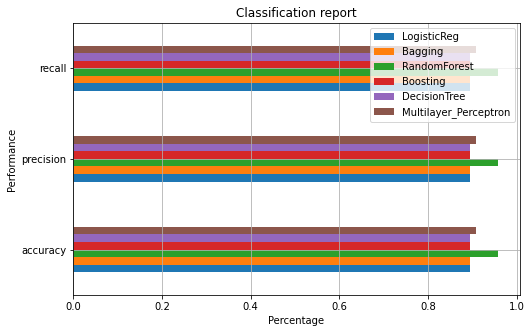

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();
ax.set_title('Classification report')
ax.set_xlabel('Percentage')
ax.set_ylabel('Performance');

# Best performing model - Random Forest model

In [52]:

# 4. Evaluate the model
y_pred_RF = RF.predict(X_test)

In [53]:
X_test=scaler.inverse_transform(X_test)

In [54]:
class_0=[]
class_1=[]
class_2=[]

In [55]:
for x,p in zip(X_test,y_pred_RF):
  if p==0:
    class_0.append(x[1])
  elif p==1:
    class_1.append(x[1])
  else:
    class_2.append(x[1])

In [56]:
print(len(class_0))
print(len(class_1))
print(len(class_2))

13389
604
1259


In [57]:
df0=pd.DataFrame(class_0, columns =['class0_frameSize'])
df1=pd.DataFrame(class_1, columns =['class1_frameSize'])
df2=pd.DataFrame(class_2, columns =['class2_frameSize'])

In [58]:
"""
mean_test = np.mean(test.frame_size)
print(mean_test)
peak_frame_test = np.max(LR_test.frame_size)
print(peak_frame_test)
total_LR = np.sum(test)
print(total_test)
"""

'\nmean_test = np.mean(test.frame_size)\nprint(mean_test)\npeak_frame_test = np.max(LR_test.frame_size)\nprint(peak_frame_test)\ntotal_LR = np.sum(test)\nprint(total_test)\n'

In [59]:
#test.shape[0]

In [60]:
def mean_max_sum(x):
  """
  x is frameSize series
  """
  mean_test = np.mean(x)
  print(mean_test)
  peak_frame_test = np.max(x)
  print(peak_frame_test)
  total_test = np.sum(x)
  print(total_test)
  return mean_test,peak_frame_test,total_test

In [61]:
def bucket_algo(df,frameSize,mean_test,peak_frame_test,total_test):
  """
  df is dataframe for frame size of every class
  frameSize is column of input df, this argument should be str type
  """
  for m in range(20):
      byte_sent = 0
      deleted_bytes = 0
      bucket_size = 0
      marked_bytes = 0
      j = 0
      l = 0
      max_bucket_size = m * peak_frame_test
      
      for i in range(df.shape[0]):
          #print(i)
          bucket_size += mean_test
          if bucket_size > max_bucket_size:
              bucket_size = max_bucket_size
              l += 1
          
          if df.loc[i, frameSize] <= bucket_size:
              byte_sent += df.loc[i, frameSize]
              bucket_size = (bucket_size - df.loc[i, frameSize])
              
          else:
              byte_sent += bucket_size
              marked_bytes += (df.loc[i, frameSize] - bucket_size)
              bucket_size = 0
              
      percent = marked_bytes * 100 / total_test
      print(percent)

In [62]:
class0_mean,class0_peakframe,class0_total=mean_max_sum(df0.class0_frameSize)

1263.8587677750393
2541.58333
16921805.04174


In [63]:
# for class_0 
#bucket_algo
bucket_algo(df0,"class0_frameSize",class0_mean,class0_peakframe,class0_total)

99.99999999999993
10.470613526327861
4.730135288039848
3.1600286941465234
2.3705883787386073
1.9598610399396534
1.7069200058959064
1.5380882767572688
1.415204745277701
1.31006771488339
1.2049306844890777
1.1108643503046067
1.0357664714515247
0.9788626619891371
0.9454134993765662
0.9153743478353333
0.8853351962941005
0.8552960447528679
0.8252568932116358
0.7952177416704043


In [64]:
class1_mean,class1_peakframe,class1_total=mean_max_sum(df1.class1_frameSize)

1263.8875551986755
2540.0
763388.08334


In [65]:
#for class_1
# bucket algo
bucket_algo(df1,"class1_frameSize",class1_mean,class1_peakframe,class1_total)

99.99999999999999
9.967187750931481
3.974920300249974
2.278604589829756
1.7365326679448714
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292
1.4587612286338292


In [66]:
class2_mean,class2_peakframe,class2_total=mean_max_sum(df2.class2_frameSize)

1257.078369030977
2540.33333
1582661.66661


In [67]:
# for class_2
# bucket algo
bucket_algo(df2,"class2_frameSize",class2_mean,class2_peakframe,class2_total)

100.0000000000001
10.506653745225403
4.3237455554712465
2.6525408114333247
1.8102170378001563
1.168176257109161
0.7229546228166172
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
0.6849731074479064
